<a href="https://colab.research.google.com/github/woodword-0/ML-Algorithms/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import multivariate_normal as mvn
from numpy import dot
from numpy.linalg import norm
import time


In [12]:
df1 = pd.read_csv('/MNIST_train.csv')
df2 = pd.read_csv('/MNIST_test.csv')

In [13]:
X_train = (1/255)*df1.iloc[:,3:].to_numpy()
y_train = df1.iloc[:,2].to_numpy()
X_test = (1/255)*df2.iloc[:,3:].to_numpy()
y_test = df2.iloc[:, 2].to_numpy()

In [14]:
y_train.shape
X_train.shape

(60000, 784)

In [ ]:
#KNN classifier

In [15]:
class KNNClassifier():
  def fit(self, X, y):
    self.X = X
    self.y = y
  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis = 1) #np.dot(X, X[i])/(norm(X)*norm(X[i]))
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt])+epsilon)
      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

In [ ]:
start_time = time.time()
knn = KNNClassifier()
knn.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
y_hat = knn.predict(X_train,1000)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
def accuracyGB(y_train,y_hat_GB):
    return np.mean(y_train == y_hat_GB)

In [ ]:
print(accuracyGB(y_train ,y_hat_GB))

In [16]:
start_time = time.time()
knn = KNNClassifier()
knn.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 7.486343383789062e-05 seconds ---


In [17]:
start_time = time.time()
y_hat = knn.predict(X_test,1000)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1602.645622253418 seconds ---


In [18]:
def accuracy(y_test,y_hat):
    return np.mean(y_test == y_hat)

In [19]:
accuracy(y_test,y_hat) #K = 1000

0.8788

In [ ]:
accuracy(y_test,y_hat) #K = 3

0.9646

In [ ]:
def show_me(X):
  plt.imshow(X.reshape(28,28))
def show_me_allmean(X,y,k):
  show_me(X[y==k,:]/len(X[y==k,:]))

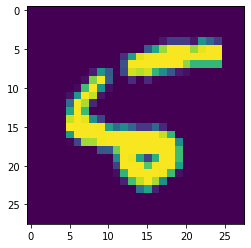

In [ ]:
show_me(X_test[8])

In [ ]:
knn.predict(X_test[8:9],3)

array([5.])

In [ ]:
X_test[0:1].shape

(1, 784)

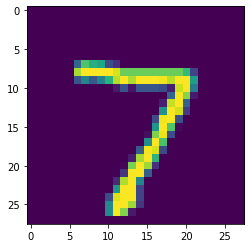

In [ ]:
show_me_allmean(X_test[0:1],y_test[0:1],7)

Text(0.5, 42.0, 'Predicted Label')

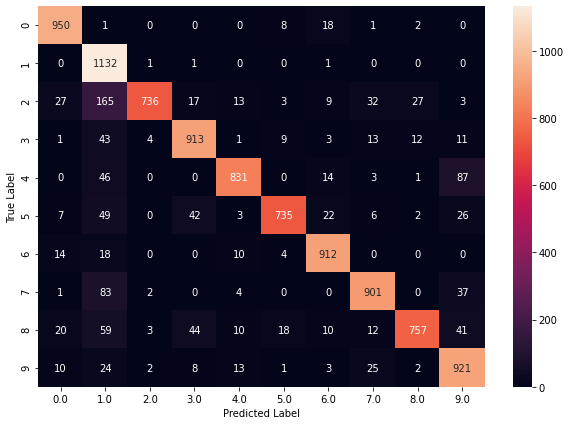

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test,name = 'Actual')
y_pred = pd.Series(y_hat, name = 'Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm,annot = True, fmt = 'd')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')